_Titanic Data Analysis_
========================

<span style='color:red'>Author : Jae Hee Lee</span>

Questioning Phase
----------------------

What factors made people more likely to survive? I initially thought that the following factors would affect the survival rate of passengers.
- Pclass
- Gender
- Age
- Fare
- Cabin

When observing each factor, I will narrow down the question.

Data Acquisition Phase
------------------------

In this phase, we will acquire data to be analyzed. We have the csv file so we will simply import the data. We would like the current data to be in 2D data structure. Therefore, I believe that Pandas DataFrame data structure is appropriate.

In [2]:
import pandas as pd

filename = 'titanic_data.csv'

titanic_df = pd.read_csv(filename)

Data Cleaning Phase
------------------------

When cleaning data, it is important to see whether there is any problem with the given data. The criteria for judging the quality of the data would be:
- data type error (e.g. date in string format)
- missing data
- user entry errors
- different schemas (e.g. age in Western and Eastern calculation)
- no unique identifier(s)
- unnecessary data


In our data, 'Passenger' variable is the unique identifier. Furthermore, there are some missing data however it is not wise to fill that with anything. As such, when parsing data, I will make it 'None'. I believe that some data in this excel file are redundant. Thus, I will drop the data including name and ticket. At first, I was not quite sure about the usability of 'PassengerId' so I left it there. However, during the data exploration phase, I realised that this variable is also redundant so I have decided to drop it. 

One intersting observation can be drawn from 'Fare' variable as there are some rows where the value for that variable is 0. I first speculated that those who have 'Fare' of 0 would be babies (i.e. as babies normally don't get charged!). However, in this case, there is a person, aged 38, who has the fare of 0. As the value of 0 does not make sense to me, to make it fair, I replaced the value to the median of the fare so that the replaced value does not heavily affect the overall analysis. 

Regarding the 'Age' variable, there are certainly massive amount of missing data (about 177) and there is no way to deal with the missing data. Therefore, I have decided to leave them with NaN values.

In [3]:
import numpy as np

# drop unnecessary data
necessary_titanic_df = titanic_df.drop(['Name', 'Ticket', 'PassengerId'],axis=1)

#Checking the validity for data that is categorical

#check whether all pclass data is within [1,2,3]
def check_validity_pclass(pclass_data):
    for i in range(0, len(pclass_data)):
        if(pclass_data.iloc[i] not in [1, 2, 3]):
            return 'False data at index of ' + i
    return True

def parse_to_int(data):
    if (data == '' or np.isnan(data)):
        return None
    else:
        return int(data)

def parse_to_float(data):
    if (data == '' or np.isnan(data)):
        return None
    else:
        return float(data)
    
def parse_fare_data(fare_data):
    if(fare_data == 0):
        return necessary_titanic_df['Fare'].median()
    else:
        return fare_data

# parse so that data_type is correct
necessary_titanic_df['Age'] = necessary_titanic_df['Age'].apply(parse_to_int)
necessary_titanic_df['Pclass'] = necessary_titanic_df['Pclass'].apply(parse_to_int)
necessary_titanic_df['Survived'] = necessary_titanic_df['Survived'].apply(parse_to_int)
necessary_titanic_df['SibSp'] = necessary_titanic_df['SibSp'].apply(parse_to_int)
necessary_titanic_df['Parch'] = necessary_titanic_df['Parch'].apply(parse_to_int)
necessary_titanic_df['Fare'] = necessary_titanic_df['Fare'].apply(parse_to_float)

# dealing with missing data
necessary_titanic_df['Fare'] = necessary_titanic_df['Fare'].apply(parse_fare_data)

Data Exploration Phase 
-----------------------------------
(Merged conclusion and communication phase here)
---------------------------------

I believe that those who survived must have paid the higher fare on average than those who did not survive (as a premium they must have prioritised those who paid the most).

**1. Exploring with Fare Data**

C:\Users\Jae Hee\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


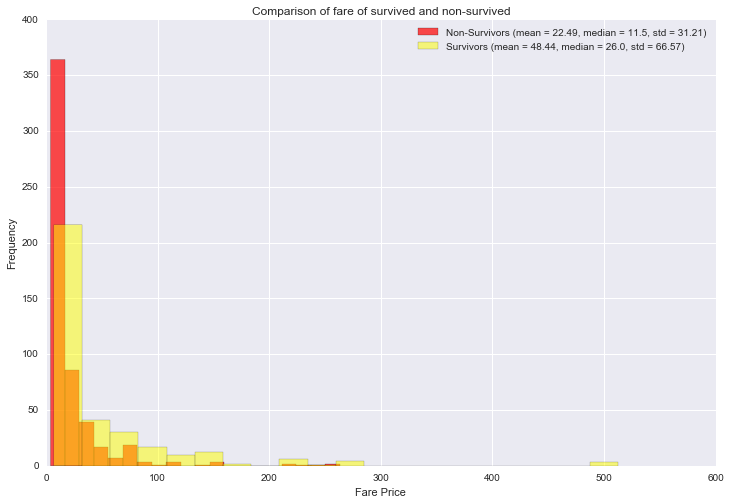

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as clrs
from matplotlib import cm
%matplotlib inline

def classify_survivors(feature, titanic_df):
    non_survivers = titanic_df[feature][titanic_df["Survived"] == 0]
    survivers     = titanic_df[feature][titanic_df["Survived"] == 1]
    return (non_survivers, survivers)

def get_survival_rate_of(feature_to_be_grouped, titanic_df, columns_to_be_returned = None):
    if(columns_to_be_returned == None):
        return titanic_df.groupby([feature_to_be_grouped],as_index=False).mean()
    else:
        return titanic_df[columns_to_be_returned].groupby([feature_to_be_grouped],as_index=False).mean()

def get_statistical_data(series):
    return (series.mean(), series.median(), series.std())

# get fare for survived & didn't survive passengers 
fare_not_survived, fare_survived = classify_survivors('Fare', necessary_titanic_df)
mean_fare_survived, median_fare_survived, std_fare_survived = get_statistical_data(fare_survived)
mean_fare_not_survived, median_fare_not_survived, std_fare_not_survived = get_statistical_data(fare_not_survived)

# sorting series
sorted_fare_not_survived = fare_not_survived.sort_values().reset_index()
sorted_fare_survived = fare_survived.sort_values().reset_index()

#visualizing data to compare two means
sorted_fare_not_survived['Fare'].plot(kind='hist', figsize=(12,8),color = 'red', label = 'Non-Survivors (mean = {}, median = {}, std = {})'.format(round(mean_fare_not_survived, 2), round(median_fare_not_survived, 2), round(std_fare_not_survived, 2)),alpha=0.7, bins = 20)
sorted_fare_survived['Fare'].plot(kind='hist', figsize=(12,8),color = 'yellow', label = 'Survivors (mean = {}, median = {}, std = {})'.format(round(mean_fare_survived, 2), round(median_fare_survived, 2), round(std_fare_survived, 2)),alpha=0.5, bins = 20)
plt.title('Comparison of fare of survived and non-survived')
plt.legend(loc='best')
plt.xlabel('Fare Price')
plt.show()

(0, 200)

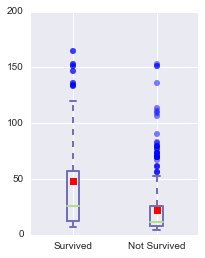

In [5]:
#Change to matrix as we will need Numpy array for boxplot visualization
survived_data = sorted_fare_survived['Fare'].as_matrix()
non_survived_data = sorted_fare_not_survived['Fare'].as_matrix()

#Draw Boxplot
fig = plt.figure(1, figsize=(3, 4))
ax = fig.add_subplot(111)
bp = ax.boxplot([survived_data, non_survived_data], showmeans=True, bootstrap = True)
ax.set_xticklabels(['Survived', 'Not Survived'])
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.ylim((0,200))

Certainly the majority of non-survived paid less than 100 and certainly nothing beyond 300. However, most survivors also paid less than 200 and surely the standard deviation for survivors are significantly higher than that of non-survivors, which tells that the distribution of fare is widely spread from the mean. Although the mean is twice as high as that of non-survivors, it is difficult to find correlation by looking at the analysis given.

**2. Exploring with Age Data**

I would like to get the survival rate of each age group to see whether there is any correlation between age and survival rate

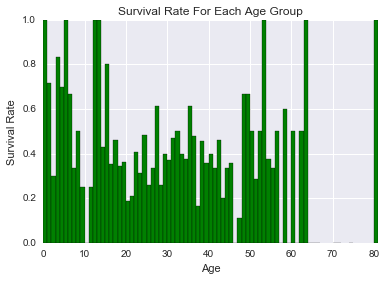

In [6]:
survival_rate_by_age = get_survival_rate_of('Age', necessary_titanic_df, ["Age", "Survived"])
plt.bar(survival_rate_by_age['Age'], survival_rate_by_age['Survived'],width=1,color='g')
plt.title('Survival Rate For Each Age Group')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.autoscale(tight=True)
plt.show()

People under 14 and over 60 showed pretty high rate of survival. We can see that people between 20 and 40 do not have high survival rate in general. Instead of getting the survival rate of those who failed to survive, I would like to get the age distribution of survived group.

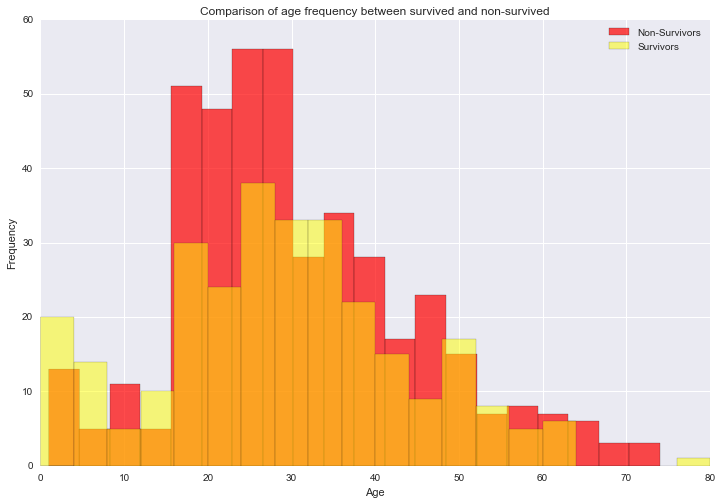

In [7]:
age_not_survived, age_survived = classify_survivors('Age', necessary_titanic_df)
age_not_survived.plot(kind='hist', figsize=(12,8),color = 'red', label = 'Non-Survivors', alpha=0.7, bins = 20)
age_survived.plot(kind='hist', figsize=(12,8),color = 'yellow', label = 'Survivors',alpha=0.5, bins = 20)
plt.title('Comparison of age frequency between survived and non-survived')
plt.legend(loc='best')
plt.xlabel('Age')
plt.show()

The distribution of age group is very similar. I am starting to realise that there may be some correlation between survival rate, age and fare price. So I want to see the correlation between Fare price, Age and Survival Rate.

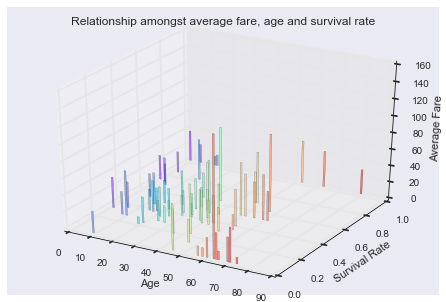

In [35]:
average_fare_paid_by_age = get_survival_rate_of('Age', necessary_titanic_df, ["Age", "Fare", "Survived"])
fig = plt.figure()
ax = Axes3D(fig)
ax.bar(average_fare_paid_by_age['Age'], average_fare_paid_by_age['Fare'], average_fare_paid_by_age['Survived'], zdir='y', color=cm.rainbow(np.linspace(0, 1, len(average_fare_paid_by_age['Fare']))),alpha=0.5) 
ax.set_xlabel('Age')
ax.set_ylabel('Survival Rate')
ax.set_zlabel('Average Fare')
ax.set_title("Relationship amongst average fare, age and survival rate")

There is no obvious correlation between these three features. 

**3. Exploring with Sex Data**

We need to differentiate children with adults. I define child to be those 14 years or under. Therefore, now the sex will tentatively have children, male and female.

C:\Users\Jae Hee\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


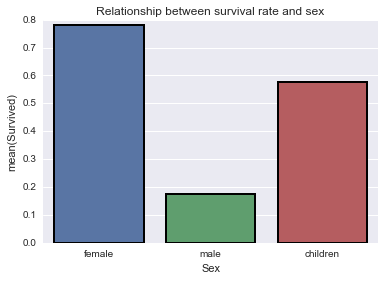

In [9]:
#reconstructing sex data
children_data = necessary_titanic_df['Survived'][necessary_titanic_df["Age"] <= 14]
adult_data = necessary_titanic_df[['Survived','Sex']][necessary_titanic_df["Age"] > 14]
children_df = pd.DataFrame([['children', children_data.mean()]], columns = ['Sex', 'Survived'])

survival_rate = get_survival_rate_of('Sex', adult_data)
survival_rate = survival_rate.append(children_df).reset_index(drop = True)
sns.barplot(x="Sex", y="Survived", data=survival_rate, linewidth= 2)
ax.set_xticklabels(['Survived', 'Not Survived'])
plt.title('Relationship between survival rate and sex')

From this analysis, we can conclude that more than half of all children survived (in fact almost 80% of women survived). However, only 19% of men could survive. Although we cannot find the causation for this observation, we can definitely see the correlation between sex and survival rate.

**4. Exploring with Cabin Data**

In [10]:
# We want to see whether the cabin and the survival rate is correlated or not.
necessary_titanic_df['Cabin'].isnull().sum()

687

We have 687 missing data for cabin details. With this variable, I believe that it would be pretty difficult to conduct the exploration. It is better not to explore with this data.

**5. Exploring with Embarked Data **

We need to explore whether the embarked and the survival rate is correlated or not. Before doing this, we need to determine whether there are any missing data.

In [11]:
necessary_titanic_df['Embarked'].isnull().sum()

2

As there are minor missing data, we will just fill them with most frequent value in this series.

In [12]:
necessary_titanic_df['Embarked'].value_counts().idxmax()

'S'

In [13]:
necessary_titanic_df["Embarked"] = necessary_titanic_df["Embarked"].fillna("S")

Now we can compute the correlation!

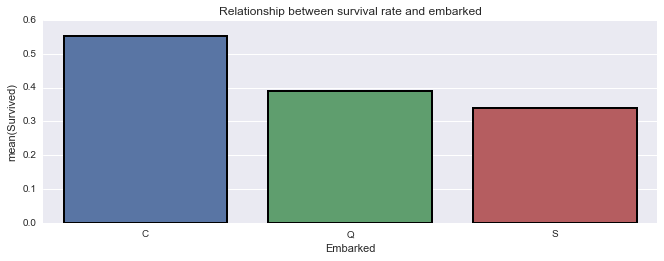

In [14]:
fig = plt.figure(1, figsize=(11, 8))
ax1 = fig.add_subplot(211)
embarked_survival_data = get_survival_rate_of('Embarked', necessary_titanic_df, ['Survived', 'Embarked'])
sns.barplot(x="Embarked", y="Survived", data=embarked_survival_data, linewidth=2, ax = ax1)
plt.title('Relationship between survival rate and embarked')

This analysis tells us that more than half of the people who survived have embarked data 'c' (and the lowest being 's'). There is a weak correlation between embarked and survival rate.

**6. Exploring with Passenger Class (Pclass) Data**


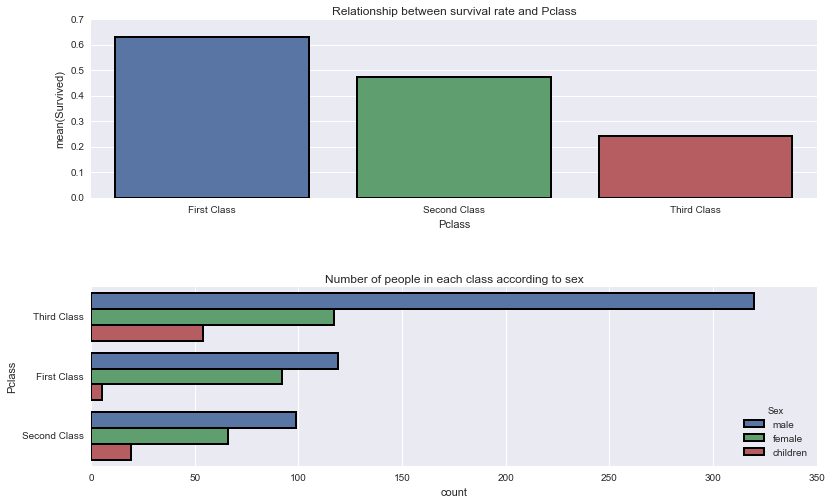

In [33]:
# We want to see whether the passenger class and the survival rate is correlated or not.
pclass_survival_data = get_survival_rate_of('Pclass', necessary_titanic_df, ['Survived', 'Pclass'])
# Create a figure instance
fig = plt.figure(1, figsize=(13, 8))
fig.subplots_adjust(hspace=.5)
# Create an axes instance
ax1 = fig.add_subplot(211)
ax1.set_title("Relationship between survival rate and Pclass")
ax2 = fig.add_subplot(212)
ax2.set_title("Number of people in each class according to sex")

sns.barplot(x="Pclass", y="Survived", data=pclass_survival_data, linewidth=2, ax = ax1)
ax1.set_xticklabels(['First Class', 'Second Class', 'Third Class'])

# another question can be asked here is whether there were any differences within the class in terms of gender.
# Via using the countplot we will count the numbers
necessary_titanic_df['Sex'].loc[necessary_titanic_df['Age'] <= 14] = 'children'
sns.countplot(y="Pclass", hue="Sex", data=necessary_titanic_df, linewidth= 2, ax = ax2)
ax2.set_yticklabels(['Third Class', 'First Class', 'Second Class'])


We can see that those who were classified as first class survived more than those who were classified as a third class passenger. One interesting thing to observe is that we have more male than female in the first class. However, we have seen previously that more females have survived than males. This probably suggests that within males who failed to survive, probably most of them belonged to third class.

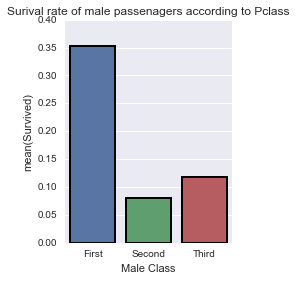

In [23]:
male_first_survival_rate = necessary_titanic_df['Survived'][(necessary_titanic_df['Pclass'] == 1) & (necessary_titanic_df['Sex'] == 'male')].mean()
male_second_survival_rate = necessary_titanic_df['Survived'][(necessary_titanic_df['Pclass'] == 2) & (necessary_titanic_df['Sex'] == 'male')].mean()
male_third_survival_rate = necessary_titanic_df['Survived'][(necessary_titanic_df['Pclass'] == 3) & (necessary_titanic_df['Sex'] == 'male')].mean()
male_by_class = pd.DataFrame([['male_first', male_first_survival_rate], ['male_second', male_second_survival_rate], ['male_third', male_third_survival_rate]], columns = ['Male Class', 'Survived'])

fig = plt.figure(1, figsize=(3, 4))
ax = fig.add_subplot(111)
sns.barplot(x="Male Class", y="Survived", data=male_by_class, linewidth= 2)
ax.set_xticklabels(['First', 'Second', 'Third'])
plt.title("Surival rate of male passenagers according to Pclass")

We can clearly see that the survival rate for first class male passengers are significantly higher than that of second and third class. THerefore, there are correlation between Pclass and survival rate and again this does not tell us any causation.

**7. Exploring with Family Relationship Data (SibSp and Parch)**

Any specific relationship does not really matter in this case. What we want to see is whether being alone or being together with family and the survival rate are correlated or not.

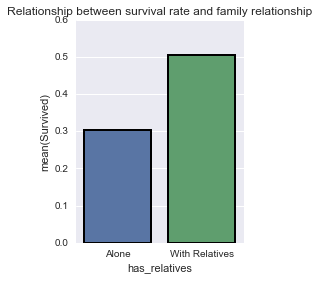

In [21]:
#Created new column named 'has_relatives'
#If they have either SibSp or Parch (or even both) then the value has_relatives would be 1
#If neither SibSp nor Parch then 0
necessary_titanic_df['has_relatives'] = necessary_titanic_df['SibSp'] + necessary_titanic_df['Parch']
necessary_titanic_df['has_relatives'].loc[necessary_titanic_df['has_relatives'] > 0] = 1
necessary_titanic_df['has_relatives'].loc[necessary_titanic_df['has_relatives'] == 0] = 0
alone_survival_data = get_survival_rate_of('has_relatives', necessary_titanic_df, ['Survived', 'has_relatives'])

fig = plt.figure(1, figsize=(3, 4))
ax = fig.add_subplot(111)
sns.barplot(x="has_relatives", y="Survived", data=alone_survival_data, linewidth= 2)
ax.set_xticklabels(['Alone', 'With Relatives'])
plt.title("Relationship between survival rate and family relationship")

With this data, we can see that passengers who travelled with families has higher survival rate than those who travelled alone. It is not to imply that this factor caused people to survive but surely we can see the correlation.

# References

- http://stanford.edu/~mwaskom/software/seaborn/index.html (Seaborn)
- https://www.kaggle.com/c/titanic/data (Titanic Data Explanation)
- http://matplotlib.org/users/pyplot_tutorial.html (Pyplot Tutorial)
- https://www.youtube.com/watch?v=afITiFR6vfw (Tutorial on Subplot - Really Concise and Easy-to-Understand)
- http://stackoverflow.com/questions/15315452/selecting-with-complex-criteria-from-pandas-dataframe ( Good Answer regarding selecting with complex criteria from pandas dataframe)
- http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/ (Boxplot)
- http://stackoverflow.com/questions/5159065/need-to-add-space-between-subplots-for-x-axis-label-maybe-remove-labelling-of-a (Adding margin between subplots)